In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [53]:

file_path = 'DataCoSupplyChainDataset.csv'

# Lisez le fichier CSV avec pandas
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [54]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [56]:
data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [57]:
data.Type.value_counts()


Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

In [58]:
data.shape

(180519, 53)

In [59]:
data.isnull().sum()


Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [60]:
data['Product Description'].value_counts()

Series([], Name: count, dtype: int64)

In [61]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [62]:
data['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

In [63]:
data['Order Item Discount'].value_counts()


Order Item Discount
0.000000      10028
6.000000       4589
12.000000      4067
4.000000       3647
8.000000       3626
              ...  
23.750000         1
96.000000         1
400.000000        1
31.980000         1
61.189999         1
Name: count, Length: 1017, dtype: int64

<Axes: xlabel='Sales', ylabel='Order Item Discount'>

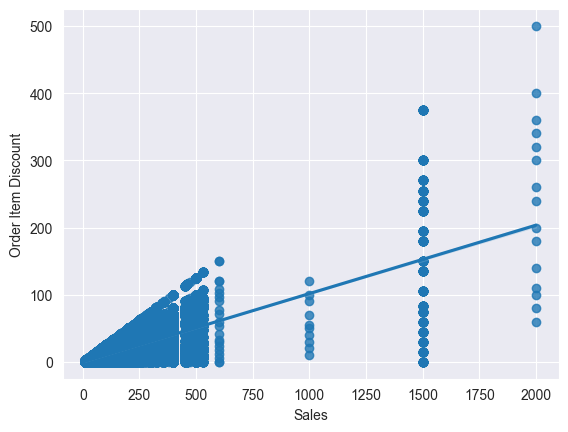

In [64]:
import seaborn as sns
sns.regplot(x= 'Sales', y = 'Order Item Discount'  , data = data)


C:\Users\Dell\IdeaProjects\machine learning\venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Corrélations avec la colonne 'Sales' après transformation:
Sales                            1.000000
Sales per customer               0.991526
Order Item Total                 0.991526
Product Price                    0.718085
Order Item Product Price         0.718085
Benefit per order                0.707376
Order Profit Per Order           0.707376
Order Item Discount              0.560583
Department Id                    0.193182
Product Card Id                  0.189827
Order Item Cardprod Id           0.189827
Product Category Id              0.180924
Category Id                      0.180924
Order Item Quantity              0.140432
Order Item Id                    0.046079
Order Id                         0.045860
Order Customer Id                0.020273
Customer Id                      0.020273
Days for shipment (scheduled)    0.005451
Order Item Profit Ratio          0.001746
Days for shipping (real)         0.001498
Order Item Discount Rate         0.000189
Order Zipcode    

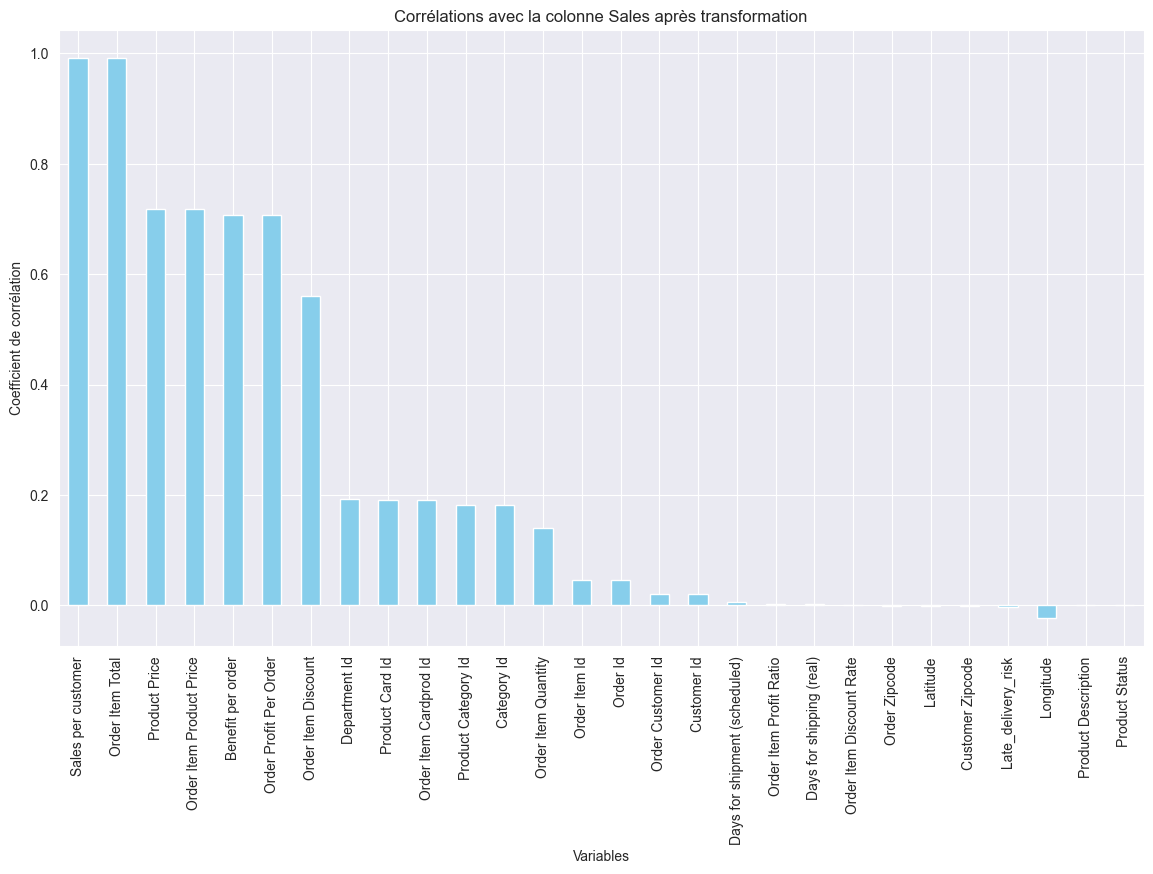

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Vérification des types de données
data.dtypes

# Sélection des colonnes numériques
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Appliquer la racine carrée aux colonnes numériques
data[numeric_columns] = data[numeric_columns].apply(lambda x: np.sqrt(x) if np.issubdtype(x.dtype, np.number) else x)

# Calcul des corrélations avec la colonne "Sales" pour les colonnes numériques
correlations_with_sales = (data[numeric_columns]
                           .corr()['Sales']
                           .sort_values(ascending=False))

# Affichage des corrélations
print("Corrélations avec la colonne 'Sales' après transformation:")
print(correlations_with_sales)

# Visualisation des corrélations avec un barplot
plt.figure(figsize=(14, 8))
correlations_with_sales.drop('Sales').plot(kind='bar', color='skyblue')
plt.title('Corrélations avec la colonne Sales après transformation')
plt.xlabel('Variables')
plt.ylabel('Coefficient de corrélation')
plt.show()


In [66]:
from sklearn.preprocessing import LabelEncoder

# Sélection des colonnes de type object
object_columns = data.select_dtypes(include=['object']).columns

# Stockage des colonnes qui étaient de type object avant l'encodage
categorical_columns_before = data[object_columns]

# Encodage des colonnes de type object avec LabelEncoder
label_encoder = LabelEncoder()
for column in object_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Affichage des colonnes qui étaient de type object avant l'encodage
print("Colonnes de type object avant l'encodage :")
print(categorical_columns_before.head())

# Affichage des colonnes devenues catégoriques après l'encodage
print("\nColonnes devenues catégoriques après l'encodage :")
data[object_columns].head()


Colonnes de type object avant l'encodage :
       Type   Delivery Status   Category Name Customer City Customer Country  \
0     DEBIT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   
1  TRANSFER     Late delivery  Sporting Goods        Caguas      Puerto Rico   
2      CASH  Shipping on time  Sporting Goods      San Jose          EE. UU.   
3     DEBIT  Advance shipping  Sporting Goods   Los Angeles          EE. UU.   
4   PAYMENT  Advance shipping  Sporting Goods        Caguas      Puerto Rico   

  Customer Email Customer Fname Customer Lname Customer Password  \
0      XXXXXXXXX          Cally       Holloway         XXXXXXXXX   
1      XXXXXXXXX          Irene           Luna         XXXXXXXXX   
2      XXXXXXXXX        Gillian      Maldonado         XXXXXXXXX   
3      XXXXXXXXX           Tana           Tate         XXXXXXXXX   
4      XXXXXXXXX           Orli      Hendricks         XXXXXXXXX   

  Customer Segment  ...  Order City Order Country order date (DateO

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,1,0,40,66,1,0,109,482,0,0,...,331,70,5961,15,475,2,78,78,27149,3
1,3,1,40,66,1,0,311,615,0,0,...,391,69,1147,13,841,5,78,78,2209,3
2,0,3,40,452,0,0,249,626,0,0,...,391,69,1146,13,841,1,78,78,1980,3
3,1,0,40,285,0,0,707,989,0,2,...,3226,8,1145,11,835,2,78,78,1752,3
4,2,0,40,66,1,0,570,454,0,1,...,3226,8,1144,11,835,6,78,78,1528,3


In [67]:
from scipy.stats import pointbiserialr
import numpy as np

data['Sales'] = np.log1p(data['Sales'])

correlations = {}
for column in object_columns:
    correlation, _ = pointbiserialr(data[column], data['Sales'])
    correlations[column] = correlation

print("Corrélations avec 'Sales' après transformation logarithmique:")
for column, correlation in correlations.items():
    print(f"{column}: {correlation}")


Corrélations avec 'Sales' après transformation logarithmique:
Type: 0.0040339130181990986
Delivery Status: 4.218782832599859e-05
Category Name: -0.29104504216795174
Customer City: 0.0003888544917979792
Customer Country: 0.001318763976697359
Customer Email: nan
Customer Fname: 0.003441719886306637
Customer Lname: -0.0015956334808394602
Customer Password: nan
Customer Segment: -0.005330159440279496
Customer State: 0.0030028888341812015
Customer Street: 0.0012353145483731038
Department Name: -0.07148375402793819
Market: -0.036234889280260224
Order City: -0.0037003721461641675
Order Country: 0.006395107552114033
order date (DateOrders): 0.02026381052500515
Order Region: 0.012332944400530142
Order State: -0.014361166646403804
Order Status: 0.004885914269061218
Product Image: -0.36521104730139375
Product Name: -0.36521104730139375
shipping date (DateOrders): 0.019039023508971922
Shipping Mode: 0.0005769400231759297


C:\Users\Dell\IdeaProjects\machine learning\venv\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [68]:
import pandas as pd

# Supprimer les colonnes qui ont la même valeur absolue de corrélation
seuil_correlation = 0.2

# Calculer la matrice de corrélation
correlations = data.corr()

# Filtrer les colonnes numériques avec une corrélation supérieure au seuil
numeric_columns_to_keep = correlations['Sales'][abs(correlations['Sales']) > seuil_correlation].index.tolist()

# Filtrer les colonnes catégoriques avec une corrélation supérieure au seuil
categorical_columns_to_keep = [column for column, correlation in correlations['Sales'].items() if abs(correlation) > seuil_correlation and column not in numeric_columns_to_keep]

# Concaténer les colonnes à garder
columns_to_keep = numeric_columns_to_keep + categorical_columns_to_keep

# Créer un nouveau DataFrame avec les colonnes à garder
data_filtered = data[columns_to_keep]

# Afficher les premières lignes du nouveau DataFrame
print("\nNouveau DataFrame avec les colonnes à garder :")
print(data_filtered.head())



Nouveau DataFrame avec les colonnes à garder :
   Benefit per order  Sales per customer  Category Name  Order Item Discount  \
0           9.552487           17.738095             40             3.620773   
1                NaN           17.645396             40             4.048456   
2                NaN           17.598864             40             4.246175   
3           4.781213           17.458809             40             4.789572   
4          11.584904           17.269916             40             5.431390   

   Order Item Product Price     Sales  Order Item Total  \
0                 18.103867  2.949891         17.738095   
1                 18.103867  2.949891         17.645396   
2                 18.103867  2.949891         17.598864   
3                 18.103867  2.949891         17.458809   
4                 18.103867  2.949891         17.269916   

   Order Profit Per Order  Product Image  Product Name  Product Price  
0                9.552487             78    

In [69]:
data_filtered = data_filtered.drop(["Order Item Product Price", "Sales per customer"], axis=1)

In [70]:
data_filtered_no_missing = data_filtered.dropna()
print("\nNouveau DataFrame sans les valeurs manquantes :")
data_filtered_no_missing.head()



Nouveau DataFrame sans les valeurs manquantes :


,Benefit per order,Category Name,Order Item Discount,Sales,Order Item Total,Order Profit Per Order,Product Image,Product Name,Product Price
0,9.552487,40,3.620773,2.949891,17.738095,9.552487,78,78,18.103867
3,4.781213,40,4.789572,2.949891,17.458809,4.781213,78,78,18.103867
4,11.584904,40,5.431390,2.949891,17.269916,11.584904,78,78,18.103867
5,4.310452,40,5.725382,2.949891,17.174982,4.310452,78,78,18.103867
6,9.756024,40,6.271364,2.949891,16.982933,9.756024,78,78,18.103867


In [71]:
import pandas as pd

# Afficher le nombre de valeurs manquantes par colonne
missing_values_count = data_filtered.isnull().sum()

# Afficher le résultat
print("Nombre de valeurs manquantes par colonne :")
print(missing_values_count)

# Supprimer les lignes contenant des valeurs manquantes
data_filtered_no_missing = data_filtered.dropna()

# Afficher le nouveau DataFrame sans les valeurs manquantes
print("\nNouveau DataFrame sans les valeurs manquantes :")
print(data_filtered_no_missing.head())


Nombre de valeurs manquantes par colonne :
Benefit per order         33784
Category Name                 0
Order Item Discount           0
Sales                         0
Order Item Total              0
Order Profit Per Order    33784
Product Image                 0
Product Name                  0
Product Price                 0
dtype: int64

Nouveau DataFrame sans les valeurs manquantes :
   Benefit per order  Category Name  Order Item Discount     Sales  \
0           9.552487             40             3.620773  2.949891   
3           4.781213             40             4.789572  2.949891   
4          11.584904             40             5.431390  2.949891   
5           4.310452             40             5.725382  2.949891   
6           9.756024             40             6.271364  2.949891   

   Order Item Total  Order Profit Per Order  Product Image  Product Name  \
0         17.738095                9.552487             78            78   
3         17.458809               

In [72]:
data_filtered_no_missing.isnull().sum()

Benefit per order         0
Category Name             0
Order Item Discount       0
Sales                     0
Order Item Total          0
Order Profit Per Order    0
Product Image             0
Product Name              0
Product Price             0
dtype: int64

In [73]:
# Supprimer les lignes avec des valeurs dupliquées
data_no_duplicates = data_filtered_no_missing.drop_duplicates()

# Afficher les premières lignes du DataFrame sans les valeurs dupliquées
print("\nNouveau DataFrame sans les valeurs dupliquées :")
print(data_no_duplicates.head())

# Afficher le nombre de lignes supprimées en raison des duplicatas
removed_duplicates_count = len(data_filtered_no_missing) - len(data_no_duplicates)
print("\nNombre de lignes supprimées en raison des duplicatas :", removed_duplicates_count)



Nouveau DataFrame sans les valeurs dupliquées :
   Benefit per order  Category Name  Order Item Discount     Sales  \
0           9.552487             40             3.620773  2.949891   
3           4.781213             40             4.789572  2.949891   
4          11.584904             40             5.431390  2.949891   
5           4.310452             40             5.725382  2.949891   
6           9.756024             40             6.271364  2.949891   

   Order Item Total  Order Profit Per Order  Product Image  Product Name  \
0         17.738095                9.552487             78            78   
3         17.458809                4.781213             78            78   
4         17.269916               11.584904             78            78   
5         17.174982                4.310452             78            78   
6         16.982933                9.756024             78            78   

   Product Price  
0      18.103867  
3      18.103867  
4      18.103867

In [74]:
# Afficher le nombre total de lignes restantes dans le DataFrame
total_rows_remaining = data_no_duplicates.shape[0]
print("\nNombre total de lignes restantes dans le DataFrame :", total_rows_remaining)



Nombre total de lignes restantes dans le DataFrame : 47173


In [75]:
data_no_duplicates.head()

,Benefit per order,Category Name,Order Item Discount,Sales,Order Item Total,Order Profit Per Order,Product Image,Product Name,Product Price
0,9.552487,40,3.620773,2.949891,17.738095,9.552487,78,78,18.103867
3,4.781213,40,4.789572,2.949891,17.458809,4.781213,78,78,18.103867
4,11.584904,40,5.431390,2.949891,17.269916,11.584904,78,78,18.103867
5,4.310452,40,5.725382,2.949891,17.174982,4.310452,78,78,18.103867
6,9.756024,40,6.271364,2.949891,16.982933,9.756024,78,78,18.103867


In [76]:
import os
import openpyxl  # Ajoutez cette ligne pour importer le module openpyxl

# Vérifier si le fichier existe déjà
if not os.path.isfile('data_no_duplicates.xlsx'):
    # Sauvegarder le DataFrame sans les duplicatas dans un fichier Excel
    data_no_duplicates.to_excel('data_no_duplicates.xlsx', index=False)
    print("Le fichier 'data_no_duplicates.xlsx' a été enregistré.")
else:
    print("Le fichier 'data_no_duplicates.xlsx' existe déjà. Aucune nouvelle sauvegarde nécessaire.")


Le fichier 'data_no_duplicates.xlsx' existe déjà. Aucune nouvelle sauvegarde nécessaire.


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assurez-vous d'avoir une colonne cible 'Sales' dans votre dataset
X = data_no_duplicates.drop('Sales', axis=1)
y = data_no_duplicates['Sales']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
random_forest_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = random_forest_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test : {mse}")




Erreur quadratique moyenne (MSE) sur l'ensemble de test : 1.7977974127200467e-06


In [78]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination (R²) : {r2}")


Coefficient de détermination (R²) : 0.999986996712226


In [79]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Erreur absolue moyenne (MAE) : {mae}")


Erreur absolue moyenne (MAE) : 0.00013163072776576352


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assurez-vous d'avoir une colonne cible 'Sales' dans votre dataset
X = data_no_duplicates.drop('Sales', axis=1)
y = data_no_duplicates['Sales']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle de régression linéaire
linear_model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
linear_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = linear_model.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test : {mse}")
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination (R²) : {r2}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Erreur absolue moyenne (MAE) : {mae}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test : 0.009585932248773563
Coefficient de détermination (R²) : 0.9306659166762217
Erreur absolue moyenne (MAE) : 0.061125521715274


In [81]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Assurez-vous d'avoir une colonne cible 'Sales' dans votre dataset
X = data_no_duplicates.drop('Sales', axis=1)
y = data_no_duplicates['Sales']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle SVM pour la régression
svm_model = SVR(kernel='rbf')  # Vous pouvez choisir le noyau approprié pour votre problème

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test : {mse}")
print(f"Coefficient de détermination (R²) : {r2}")
print(f"Erreur absolue moyenne (MAE) : {mae}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test : 0.0032000354657707583
Coefficient de détermination (R²) : 0.9768544654953949
Erreur absolue moyenne (MAE) : 0.04950838710433243


In [82]:
from sklearn.linear_model import Ridge

# Initialiser le modèle de régression Ridge
ridge_model = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha selon vos besoins

# Entraîner le modèle sur l'ensemble d'entraînement
ridge_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_ridge = ridge_model.predict(X_test)

# Calculer les métriques d'évaluation pour le modèle de régression Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test (Régression Ridge) : {mse_ridge}")
print(f"Coefficient de détermination (R²) pour le modèle de régression Ridge : {r2_ridge}")
print(f"Erreur absolue moyenne (MAE) pour le modèle de régression Ridge : {mae_ridge}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test (Régression Ridge) : 0.009586361998628412
Coefficient de détermination (R²) pour le modèle de régression Ridge : 0.9306628083387672
Erreur absolue moyenne (MAE) pour le modèle de régression Ridge : 0.061128434704479345


In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialiser le modèle de Gradient Boosting pour la régression
gb_model = GradientBoostingRegressor(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
gb_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)

# Calculer les métriques d'évaluation pour le modèle de Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test (Gradient Boosting) : {mse_gb}")
print(f"Coefficient de détermination (R²) pour le modèle de Gradient Boosting : {r2_gb}")
print(f"Erreur absolue moyenne (MAE) pour le modèle de Gradient Boosting : {mae_gb}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test (Gradient Boosting) : 5.720267696682279e-05
Coefficient de détermination (R²) pour le modèle de Gradient Boosting : 0.9995862587937998
Erreur absolue moyenne (MAE) pour le modèle de Gradient Boosting : 0.005539103689312916


In [84]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

bayesian_model = BayesianRidge()

# Entraîner le modèle sur l'ensemble d'entraînement
bayesian_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_bayesian = bayesian_model.predict(X_test)

# Calculer les métriques d'évaluation pour le modèle de régression bayésienne
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)
mae_bayesian = mean_absolute_error(y_test, y_pred_bayesian)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test (Régression bayésienne) : {mse_bayesian}")
print(f"Coefficient de détermination (R²) pour le modèle de régression bayésienne : {r2_bayesian}")
print(f"Erreur absolue moyenne (MAE) pour le modèle de régression bayésienne : {mae_bayesian}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test (Régression bayésienne) : 0.009586394969751475
Coefficient de détermination (R²) pour le modèle de régression bayésienne : 0.9306625698619521
Erreur absolue moyenne (MAE) pour le modèle de régression bayésienne : 0.06112832927002869


In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialiser le modèle k-NN pour la régression (choisissez le nombre de voisins approprié avec n_neighbors)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Entraîner le modèle sur l'ensemble d'entraînement
knn_model.fit(X_train, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred_knn = knn_model.predict(X_test)

# Calculer les métriques d'évaluation pour le modèle k-NN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"\nErreur quadratique moyenne (MSE) sur l'ensemble de test (k-NN) : {mse_knn}")
print(f"Coefficient de détermination (R²) pour le modèle k-NN : {r2_knn}")
print(f"Erreur absolue moyenne (MAE) pour le modèle k-NN : {mae_knn}")



Erreur quadratique moyenne (MSE) sur l'ensemble de test (k-NN) : 0.00013742727825715874
Coefficient de détermination (R²) pour le modèle k-NN : 0.9990060023256621
Erreur absolue moyenne (MAE) pour le modèle k-NN : 0.002408081772745156


In [86]:
# Dictionnaire pour stocker les résultats des métriques
metrics = {}

# Entraîner et évaluer chaque modèle
for model, name in zip([random_forest_model, bayesian_model, knn_model, gb_model, ridge_model, linear_model, svm_model],
                       ['RandomForest', 'BayesianRidge', 'k-NN', 'GradientBoosting', 'Ridge', 'LinearRegression', 'SVM']):
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Stocker les métriques dans le dictionnaire
    metrics[name] = [mse, r2, mae]

# Créer un DataFrame à partir du dictionnaire
df_metrics = pd.DataFrame(metrics, index=['MSE', 'R²', 'MAE'])

# Afficher le tableau de comparaison
df_metrics

,RandomForest,BayesianRidge,k-NN,GradientBoosting,Ridge,LinearRegression,SVM
MSE,0.000002,0.009586,0.000137,0.000057,0.009586,0.009586,0.003200
R²,0.999987,0.930663,0.999006,0.999586,0.930663,0.930666,0.976854
MAE,0.000132,0.061128,0.002408,0.005539,0.061128,0.061126,0.049508


In [87]:
import numpy as np
# Calculer la note moyenne pondérée pour chaque modèle
model_scores = []
for name, values in metrics.items():
    weighted_score = np.average(values, weights=[0.25, 0.5, 0.25])
    model_scores.append([name, weighted_score])

# Créer un DataFrame pour stocker les notes
df_scores = pd.DataFrame(model_scores, columns=['Model', 'Score'])

# Classer les modèles selon leur note
df_scores = df_scores.sort_values(by='Score', ascending=False)

# Afficher le tableau de classement
df_scores

,Model,Score
6,SVM,0.501604
3,GradientBoosting,0.501192
2,k-NN,0.500139
0,RandomForest,0.500027
5,LinearRegression,0.483011
4,Ridge,0.483010
1,BayesianRidge,0.483010


In [88]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import openpyxl
import os

# Charger les données d'entraînement depuis un fichier Excel
data_train = pd.read_excel('data_no_duplicates.xlsx')

# Diviser le dataset d'entraînement
X_train = data_train.drop('Sales', axis=1)
y_train = data_train['Sales']

# Initialiser le modèle de régression linéaire
linear_model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
linear_model.fit(X_train, y_train)

# Générer un nouveau nom de fichier Excel avec les mêmes colonnes que data_no_duplicates.xlsx (sauf 'Sales')
counter = 1
while True:
    excel_file_path = f'nouveau_fichier_excel_{counter}.xlsx'
    if not os.path.exists(excel_file_path):
        break
    counter += 1

wb = openpyxl.Workbook()
sheet = wb.active

# Écrire les en-têtes des colonnes dans le fichier Excel
for col_index, col_name in enumerate(X_train.columns):
    sheet.cell(row=1, column=col_index + 1, value=col_name)

# Laissez l'utilisateur entrer les données de test dans le fichier Excel (à l'exception de la colonne 'Sales')
user_input_row = 2
for col_index, col_name in enumerate(X_train.columns):
    if col_name != 'Sales':
        user_input = input(f"Entrez la valeur pour '{col_name}': ")

        # Vérifier que la valeur saisie peut être convertie en nombre
        try:
            user_input = float(user_input)
        except ValueError:
            print(f"Erreur: La valeur '{user_input}' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.")
            wb.close()
            exit()

        sheet.cell(row=user_input_row, column=col_index + 1, value=user_input)

# Sauvegarder le fichier Excel avec les données de test
wb.save(excel_file_path)

# Lire les données de test depuis le fichier Excel en sautant la première ligne
test_data_input = pd.read_excel(excel_file_path, header=None, skiprows=1, names=X_train.columns)

# Prédire les valeurs sur l'ensemble de test fourni par l'utilisateur
y_pred = linear_model.predict(test_data_input)

# Ajouter les prédictions au fichier Excel
sheet.cell(row=1, column=9, value='Sales_Predicted')  # Colonne I (9e colonne en commençant par 1)
sheet.cell(row=user_input_row, column=9, value=y_pred[0])  # Colonne I

# Sauvegarder le fichier Excel avec les prédictions
wb.save(excel_file_path)

print(f"Les prédictions ont été ajoutées au fichier Excel '{excel_file_path}'.")


Erreur: La valeur '' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.
Erreur: La valeur '' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.
Erreur: La valeur '' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.
Erreur: La valeur '' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.
Erreur: La valeur '' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.
Erreur: La valeur '' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.
Erreur: La valeur '' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.
Erreur: La valeur '' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.


ValueError: Found array with 0 sample(s) (shape=(0, 8)) while a minimum of 1 is required by LinearRegression.

In [ ]:
import pandas as pd
import openpyxl
import os

# Charger les données d'entraînement depuis un fichier Excel
data_train = pd.read_excel('data_no_duplicates.xlsx')

# Supprimer la colonne 'Sales' du DataFrame
data_train = data_train.drop(columns=['Sales'], errors='ignore')

# Générer un nouveau nom de fichier Excel avec le nombre de colonnes
counter = 1
while True:
    excel_file_path = f'nouveau_fichier_excel_{counter}.xlsx'
    if not os.path.exists(excel_file_path):
        break
    counter += 1

wb = openpyxl.Workbook()
sheet = wb.active

# Écrire les en-têtes des colonnes dans le fichier Excel
for col_index, col_name in enumerate(data_train.columns):
    sheet.cell(row=1, column=col_index + 1, value=col_name)

# Laissez l'utilisateur entrer les données de test dans le fichier Excel
user_input_row = 2
for col_index, col_name in enumerate(data_train.columns):
    user_input = input(f"Entrez la valeur pour '{col_name}': ")

    # Vérifier que la valeur saisie peut être convertie en nombre
    try:
        user_input = float(user_input)
    except ValueError:
        print(f"Erreur: La valeur '{user_input}' n'est pas un nombre. Assurez-vous d'entrer des valeurs numériques.")
        wb.close()
        exit()

    sheet.cell(row=user_input_row, column=col_index + 1, value=user_input)

# Sauvegarder le fichier Excel avec les données de test
wb.save(excel_file_path)

print(f"Les données de test ont été ajoutées au fichier Excel '{excel_file_path}'.")